In [1]:
import pandas as pd

In [ ]:
#you can aggregate time series using the .groupby() method, but depending on use case there are better methods
#resampling is a special form of time series aggregation that modifies date indices and fills any gaps to create continous date values
 

In [2]:
retail = pd.read_csv("../retail/retail.csv", parse_dates=["date"])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [3]:
retail.groupby([retail["date"].dt.year, retail["date"].dt.month]).agg("sum").round(2)

C:\Users\BERK\AppData\Local\Temp\ipykernel_13948\4231539745.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail.groupby([retail["date"].dt.year, retail["date"].dt.month]).agg("sum").round(2)


id  store_nbr        sales  onpromotion
date date                                                   
2016 1     109023650109    1519155  23977804.89       119578
     2     104752572111    1421145  21947408.80       183541
     3     114930124749    1519155  23131780.88       181790
     4     114128305830    1470150  25963025.10       215312
     5     120935040633    1519155  24779432.26       370019
     6     119939514750    1470150  22209218.58       285416
     7     126939956517    1519155  23462672.43       264605
     8     129991635081    1519155  22452414.32       271592
     9     128703960990    1470150  22417448.10       296361
     10    135996550965    1519155  24030389.82       370514
     11    134515169910    1470150  24642640.20       438358
     12    137373141510    1470150  29640287.58       517498
2017 1     144954704169    1519155  26328159.94       363428
     2     133549812396    1372140  23250112.37       297254
     3     150762737565    1519155  26704017.69       339291
     4     148805027910    1470150  25895308.49       371042
     5     156767653449    1519155  26911847.25       414646
     6     154616236830    1470150  25682822.12       394582
     7     162772569333    1519155  27011477.57       409128
     8      79856476425     735075  12433322.94       160278

In [6]:
retail.set_index("date").resample("Y").sum().round(2)

C:\Users\BERK\AppData\Local\Temp\ipykernel_13948\1379472637.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail.set_index("date").resample("Y").sum().round(2)


,id,store_nbr,sales,onpromotion
date,,,,
2016-12-31,1477229623155,17886825,2.886545e+08,3514584
2017-12-31,1132085218077,11124135,1.942171e+08,2749649


In [8]:
#rolling aggregations let you perform calculations on shifting periods of time
#can be used to calculate things like moving averages which are helpful in reducing noise when plotting trends

In [9]:
retail_daily = retail.set_index("date").loc[:, "sales"].resample("D").sum().round(2)

retail_daily

date
2016-01-01      16433.39
2016-01-02    1066677.42
2016-01-03    1226735.72
2016-01-04     955956.88
2016-01-05     835320.44
                 ...    
2017-08-11     826373.72
2017-08-12     792630.54
2017-08-13     865639.68
2017-08-14     760922.41
2017-08-15     762661.94
Freq: D, Name: sales, Length: 593, dtype: float64

<Axes: xlabel='date'>

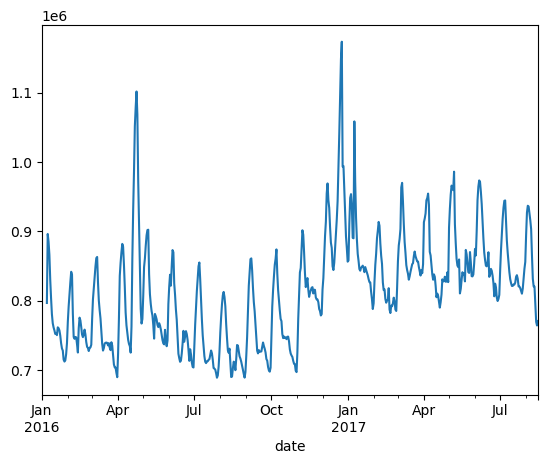

In [14]:
retail_daily.rolling(7).mean().plot()